In [12]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [13]:
subscription_key = 'af30cb4ec2a44010a054185e92b1a7bd'

In [14]:
face_api_url = 'https://daegufaceapi.cognitiveservices.azure.com/face/v1.0/detect'

In [84]:
image_url = 'https://cdnimg.melon.co.kr/resource/image/cds/musicstory/imgUrl20201125083158781.jpg/melon/optimize/90'

In [85]:
img = Image.open(BytesIO(requests.get(image_url).content))

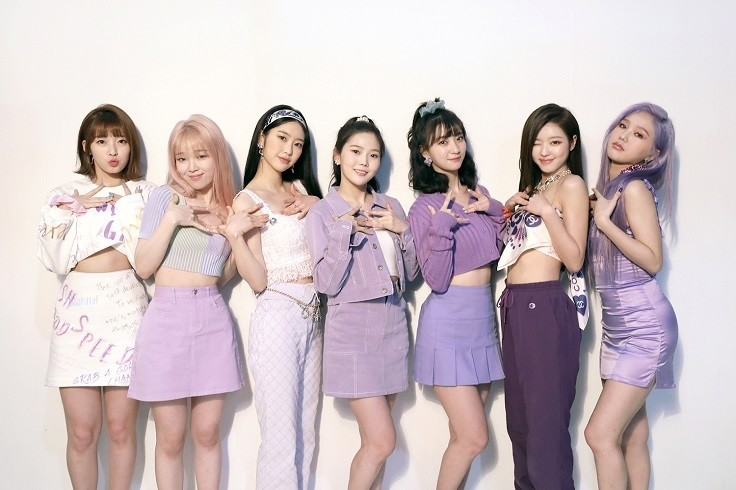

In [86]:
img

In [87]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [88]:
params = {
    'returnFaceId' : 'true',
    'returnFacelandmarks' : 'false',
    'returnFaceAttributes' : 'age, gender,emotion'
}

In [89]:
data = {'url' : image_url}

In [90]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)

In [91]:
faces = response.json()

In [92]:
faces

[{'faceId': '6dfb8081-4412-4bce-b60a-c4c191186c36',
  'faceRectangle': {'top': 116, 'left': 603, 'width': 43, 'height': 43},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.001,
    'neutral': 0.768,
    'sadness': 0.231,
    'surprise': 0.0}}},
 {'faceId': 'be918fb0-1cf8-49eb-a3fe-ecab7b2a01f9',
  'faceRectangle': {'top': 130, 'left': 91, 'width': 42, 'height': 42},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.152,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.001,
    'neutral': 0.845,
    'sadness': 0.001,
    'surprise': 0.001}}},
 {'faceId': 'a8671cdb-2957-4692-83a0-85e621885f7d',
  'faceRectangle': {'top': 146, 'left': 173, 'width': 41, 'height': 41},
  'faceAttributes': {'gender': 'female',
   'age': 21.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
  

## 얼굴 이정표
[얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection)
![얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/images/landmarks.1.jpg)

In [93]:
def CreateImage(faces):
    
    for face in faces:
        
        #사각형을 출력하기 위한 부분
        rect = face['faceRectangle']
        top = rect['top']
        left = rect['left']
        bottom = rect['height'] + top
        right = rect['width'] + left
        
        draw.rectangle(((left,top),(right,bottom)), outline = 'red')
        
        #글씨를 쓰기 위한 부분
        fontX = left
        fontY = top - 25
        
        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        result = 'Gender: {0} \n Age:{1}'.format(gender,age)
        
        draw.text((fontX, fontY), result, fill='red')
        

In [94]:
draw = ImageDraw.Draw(img)

In [95]:
CreateImage(faces)

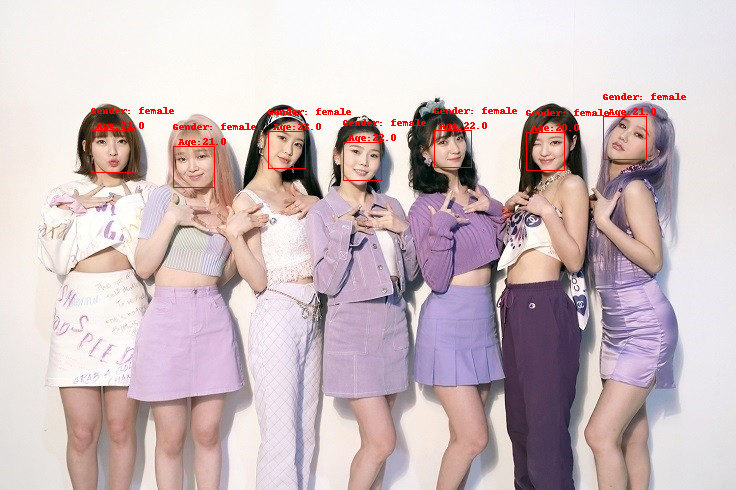

In [96]:
img